In [134]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [135]:
data = keras.datasets.imdb

In [136]:
max_word = 10000

In [137]:
(x_train,y_train),(x_test,y_test) = data.load_data(num_words=10000)

In [138]:
x_train.shape,y_train.shape

((25000,), (25000,))

文本训练成密集向量

In [139]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train,300)
x_test = keras.preprocessing.sequence.pad_sequences(x_test,300)

In [140]:
model = keras.models.Sequential()

In [141]:
model.add(layers.Embedding(10000,50,input_length=300))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

In [142]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 300, 50)           500000    
_________________________________________________________________
flatten_16 (Flatten)         (None, 15000)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                960064    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 65        
Total params: 1,460,129
Trainable params: 1,460,129
Non-trainable params: 0
_________________________________________________________________


In [143]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['acc'])

In [144]:
history = model.fit(x_train,y_train,epochs=15,batch_size=256,validation_data=(x_test,y_test))

Epoch 1/15
98/98 [==============================] - 5s 53ms/step - loss: 0.5999 - acc: 0.6422 - val_loss: 0.3360 - val_acc: 0.8576
Epoch 2/15
98/98 [==============================] - 5s 53ms/step - loss: 0.2327 - acc: 0.9095 - val_loss: 0.2836 - val_acc: 0.8818
Epoch 3/15
98/98 [==============================] - 5s 53ms/step - loss: 0.0864 - acc: 0.9752 - val_loss: 0.3157 - val_acc: 0.8758
Epoch 4/15
98/98 [==============================] - 5s 53ms/step - loss: 0.0283 - acc: 0.9955 - val_loss: 0.3732 - val_acc: 0.8707
Epoch 5/15
98/98 [==============================] - 5s 52ms/step - loss: 0.0101 - acc: 0.9994 - val_loss: 0.4034 - val_acc: 0.8738
Epoch 6/15
98/98 [==============================] - 5s 53ms/step - loss: 0.0048 - acc: 0.9998 - val_loss: 0.4417 - val_acc: 0.8722
Epoch 7/15
98/98 [==============================] - 5s 54ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.4546 - val_acc: 0.8754
Epoch 8/15
98/98 [==============================] - 5s 52ms/step - loss: 0.0019 - a

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

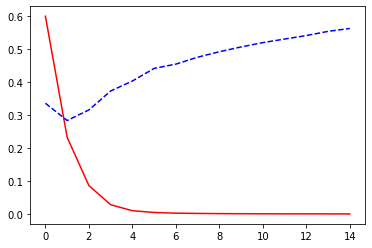

In [146]:
plt.plot(history.epoch,history.history['loss'],'r')
plt.plot(history.epoch,history.history['val_loss'],'b--')

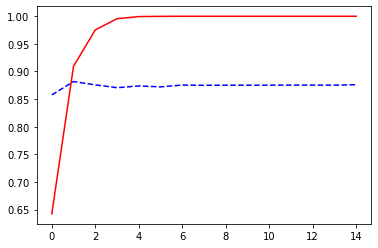

In [147]:
plt.plot(history.epoch,history.history['acc'],'r')
plt.plot(history.epoch,history.history['val_acc'],'b--')